<a href="https://colab.research.google.com/github/manishkhanal1989/Project/blob/main/Heart_Disease_Classification_Exploratory_Analysis_and_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Classification: Exploratory Analysis and Model Comparison**

By: **Manish Khanal**

**Data Information:**

**Sources:**

The dataset is obtained from UCI Machine Learning Repository

https://archive.ics.uci.edu/dataset/45/heart+disease

**Description:**

Databases: Cleveland, Hungary, Switzerland, and VA Long Beach

**Dataset Characteristics:**
Multivariate
Subject Area: Health and Medicine
Associated Tasks: Classification
Feature Type: Categorical, Integer, Real
Instances: 303
Features: 13

**Additional Information:**

The dataset contains 76 attributes, with published experiments focusing on a subset of 14.
The "goal" field indicates the presence of heart disease (integer values 0 to 4).
Experiments usually distinguish disease presence (values 1, 2, 3, 4) from absence (value 0).
Patient names and social security numbers were replaced with dummy values for privacy.
Only the Cleveland database has been widely used by machine learning researchers.

**Key Features:**

Age (age): Age in years
Sex (sex): Gender (1 = male; 0 = female)
Chest Pain Type (cp):
1: Typical angina
2: Atypical angina
3: Non-anginal pain
4: Asymptomatic
Resting Blood Pressure (trestbps): Resting blood pressure on admission (mm Hg)
Serum Cholesterol (chol): Serum cholestoral in mg/dl
Fasting Blood Sugar (fbs): Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
Resting Electrocardiographic Results (restecg):
0: Normal
1: ST-T wave abnormality
2: Probable or definite left ventricular hypertrophy
Maximum Heart Rate Achieved (thalach):
Exercise-Induced Angina (exang): (1 = yes; 0 = no)
ST Depression Induced by Exercise (oldpeak): Relative to rest
Missing Values: Yes

**Target Feature**

target

The goal is to predict whether a patient has heart disease or not (1= yes and 0 is no) based on other different variables.

In [132]:
#Import necessary libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Model selection and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Additional imports
from sklearn.model_selection import learning_curve

In [133]:
#Load Heart Disease dataset using pandas
from google.colab import files

uploaded = files.upload()

Saving heart-disease.csv to heart-disease (5).csv


In [110]:
df = pd.read_csv(next(iter(uploaded)))

In [134]:
#Check the first 5 rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [136]:
#Checking details about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [137]:
#Checking Missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

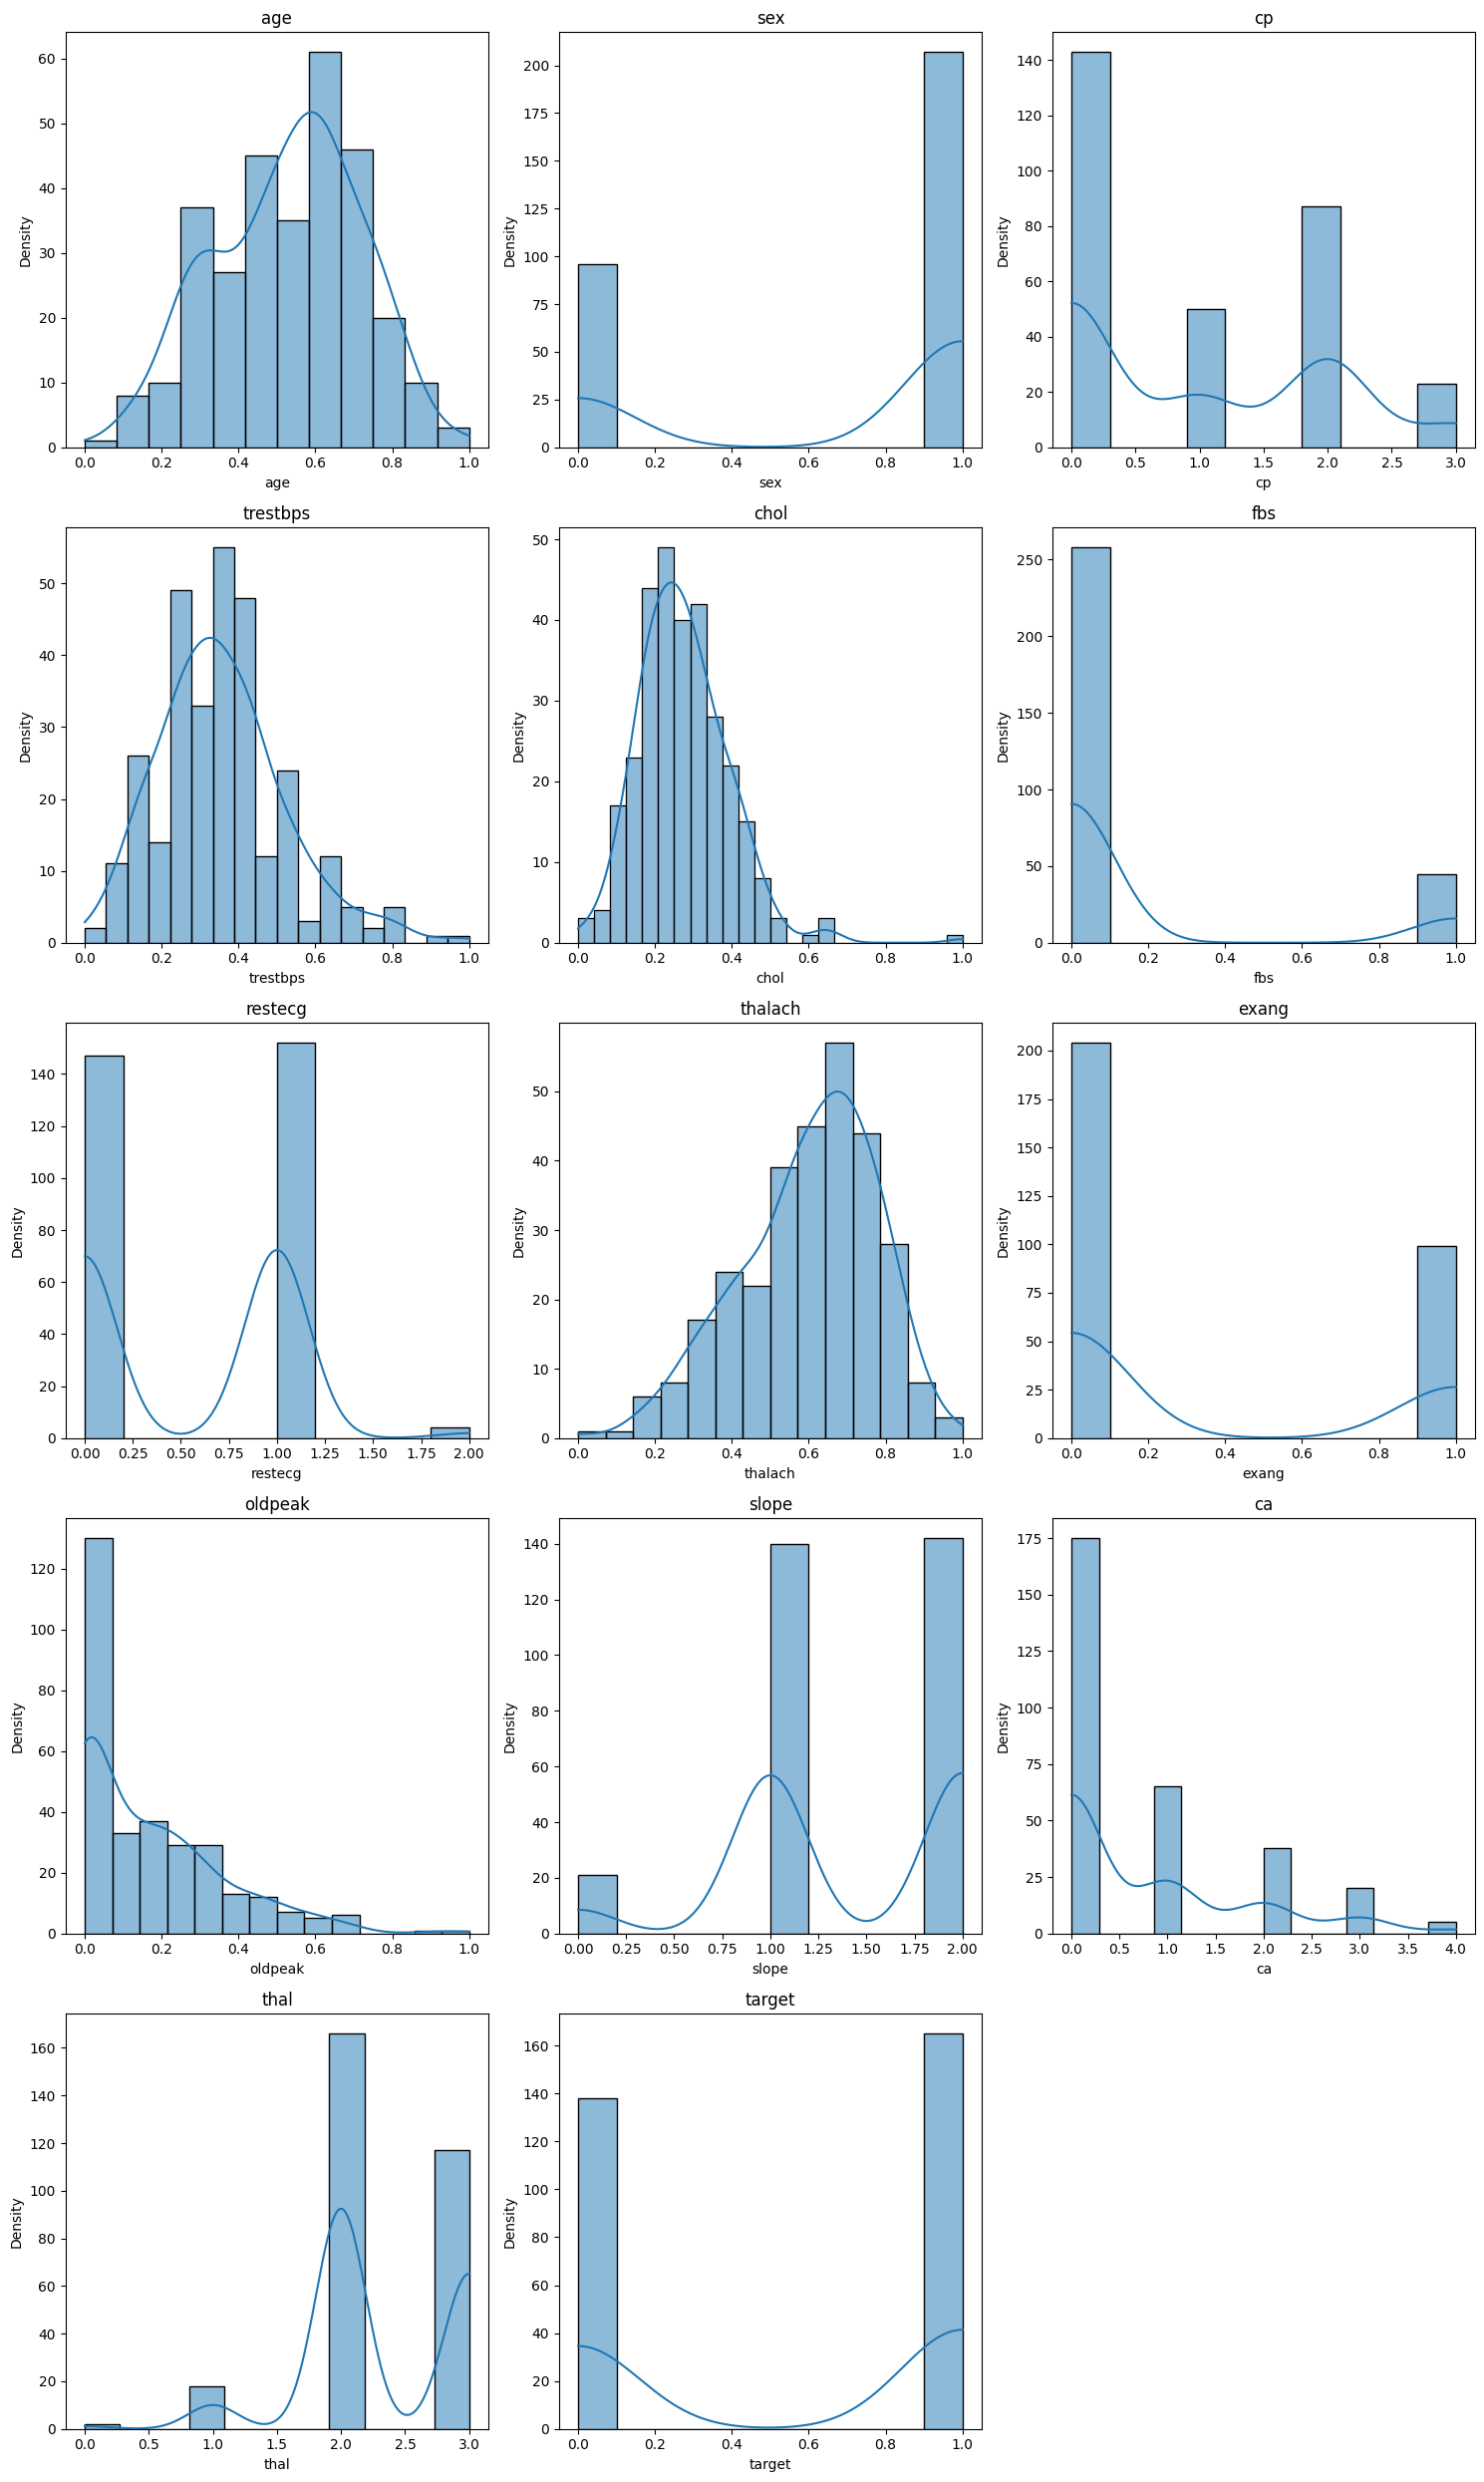

In [138]:
#Checking distribution of the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create distribution plots for numeric features
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 + 1, ncols=3, figsize=(15, 5 * (len(numeric_columns)//3 + 1)))

# Flatten the axes array
axes = axes.flatten()

# Loop through numeric columns and create distribution plots
for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=df, kde=True, ax=axes[i], common_norm=False)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

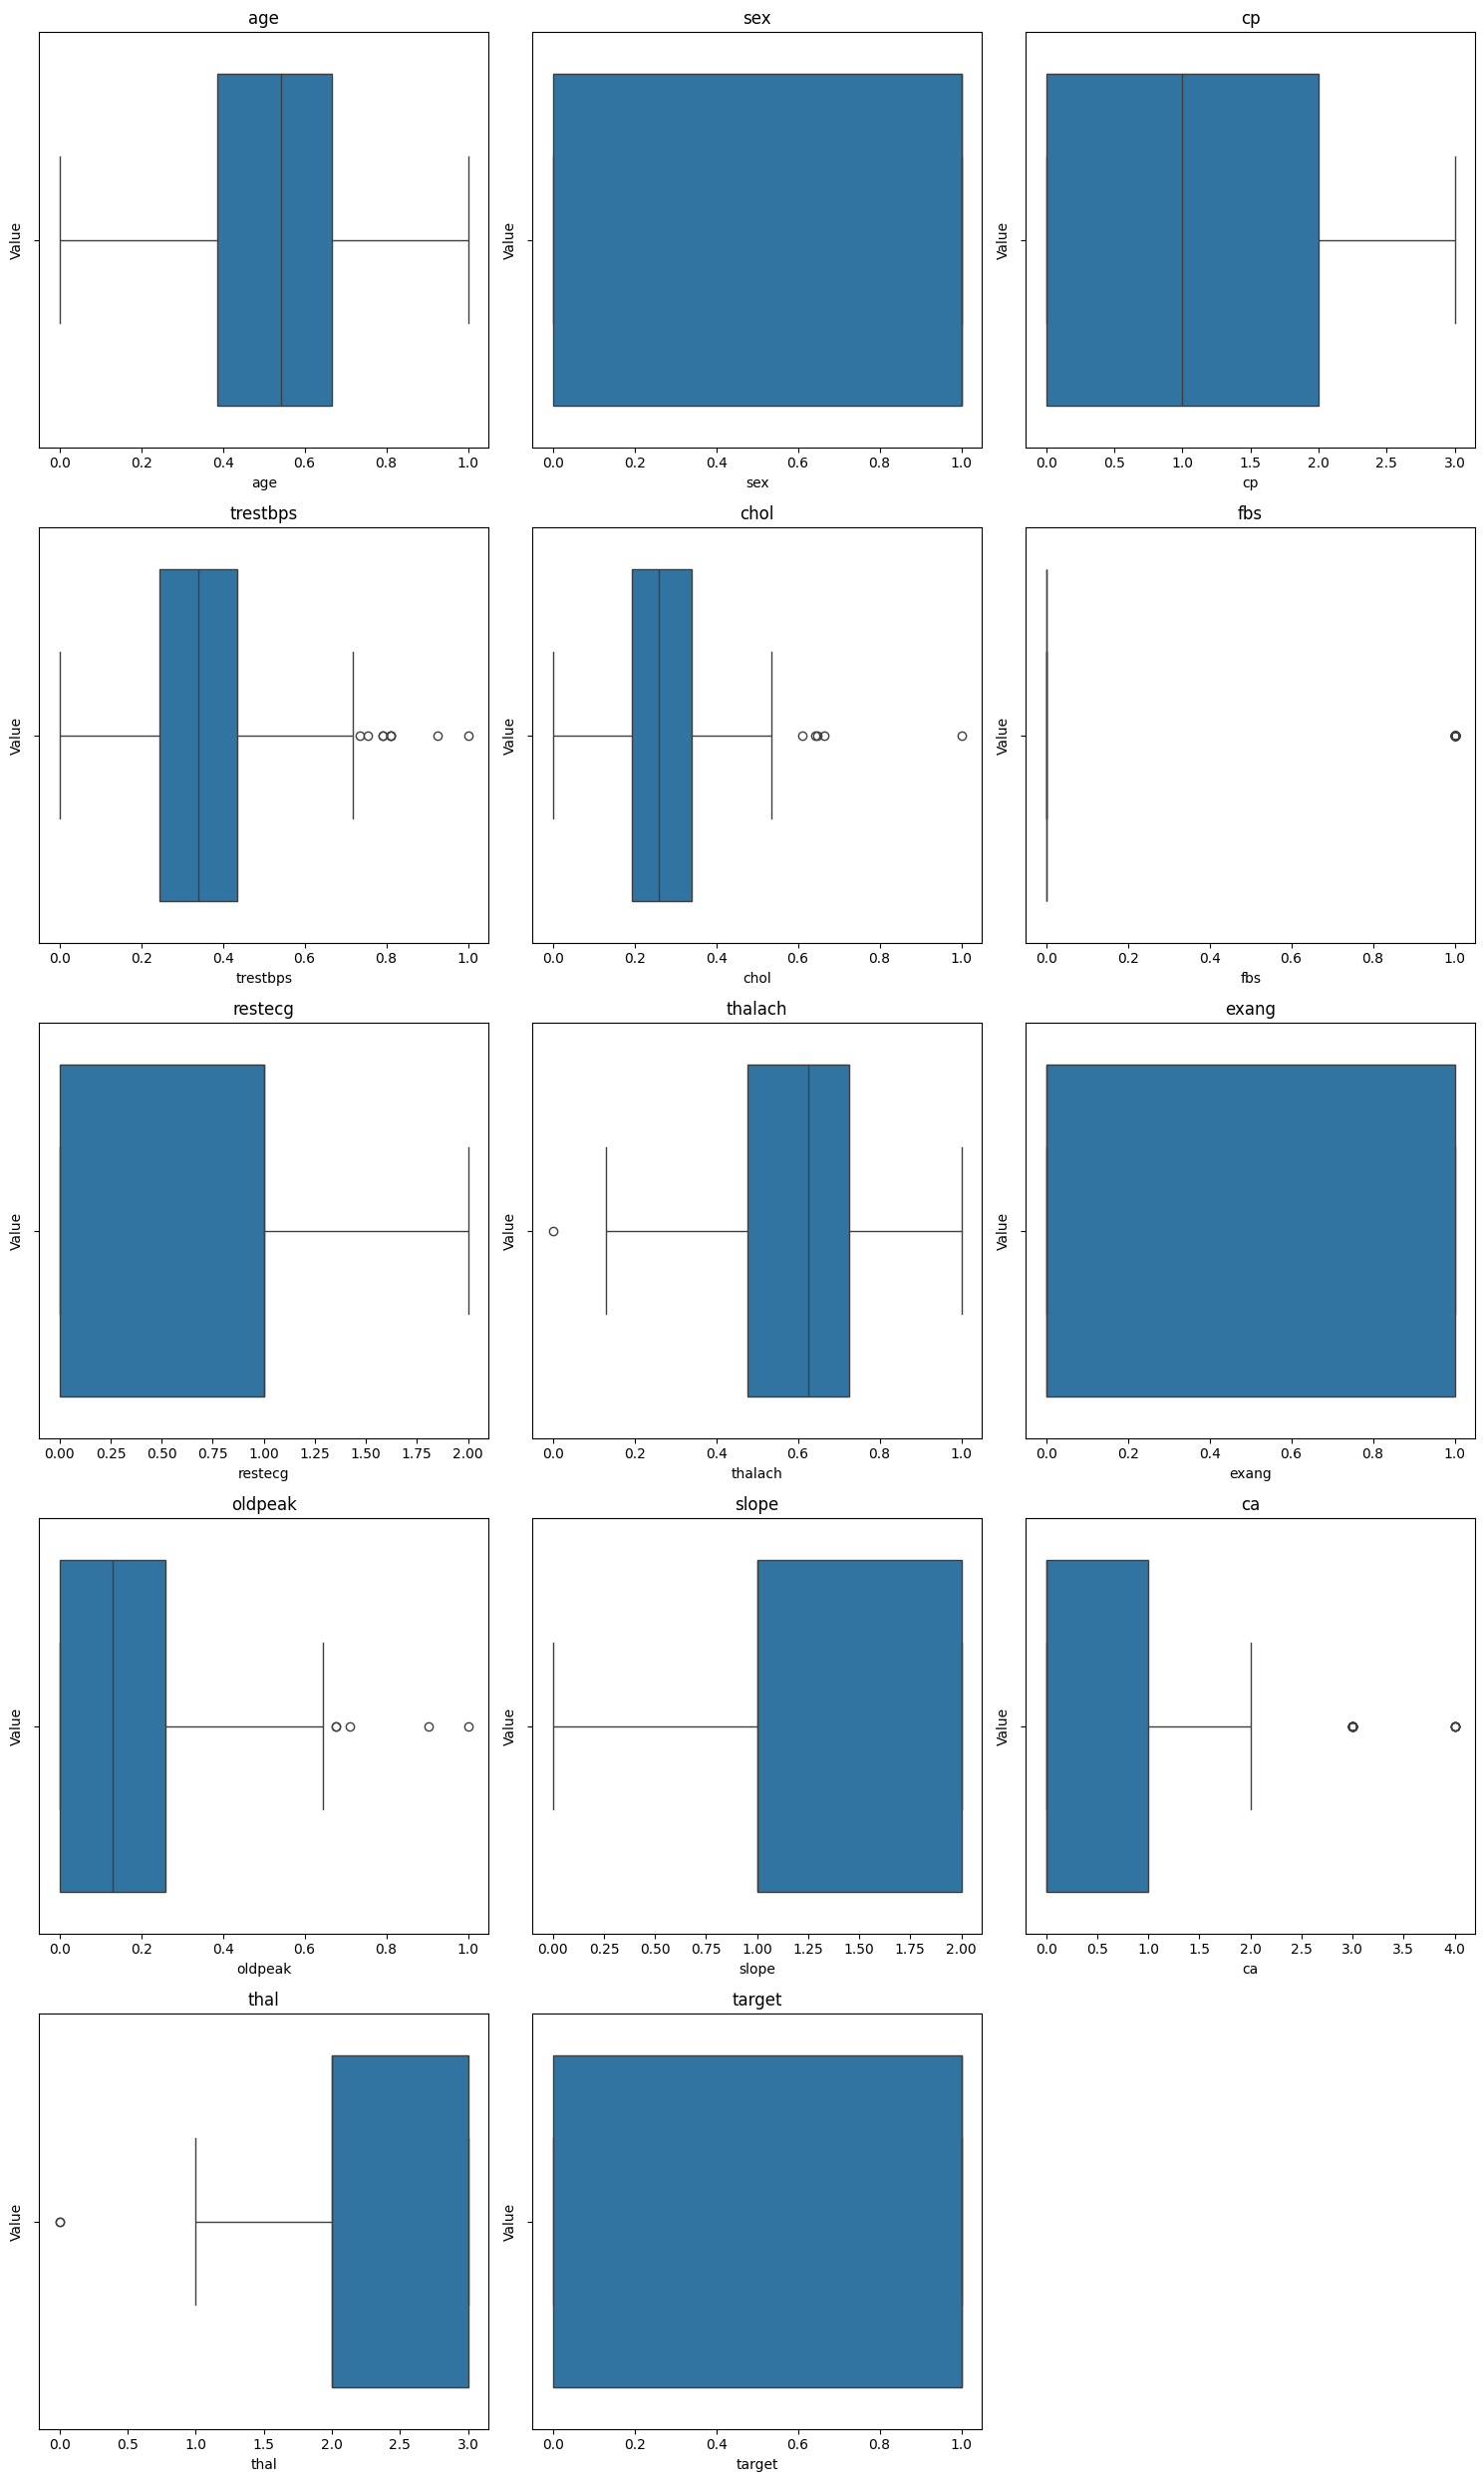

In [139]:
#Checking outliers
# Create boxplots to visualize outliers
fig, axes = plt.subplots(nrows=len(numeric_columns)//3 + 1, ncols=3, figsize=(15, 5 * (len(numeric_columns)//3 + 1)))

# Flatten the axes array
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Rather than promptly discarding these outliers, a conscious decision was taken to preserve them within the dataset. This choice was influenced by the acknowledgment that outliers could encapsulate invaluable insights, providing distinctive perspectives on authentic variations within the data. By retaining these extreme observations, we aim to foster a more comprehensive understanding of the underlying patterns and uncover potential rare occurrences that might have significant implications. This approach ensures a thorough exploration of the dataset, balancing the need to mitigate noise with the desire to capture the richness and complexity inherent in the data.

In [140]:
#Normalizing some columns
# Columns to be normalized
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [141]:
#Checking first 5 rows of the dataframe after normalizing
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


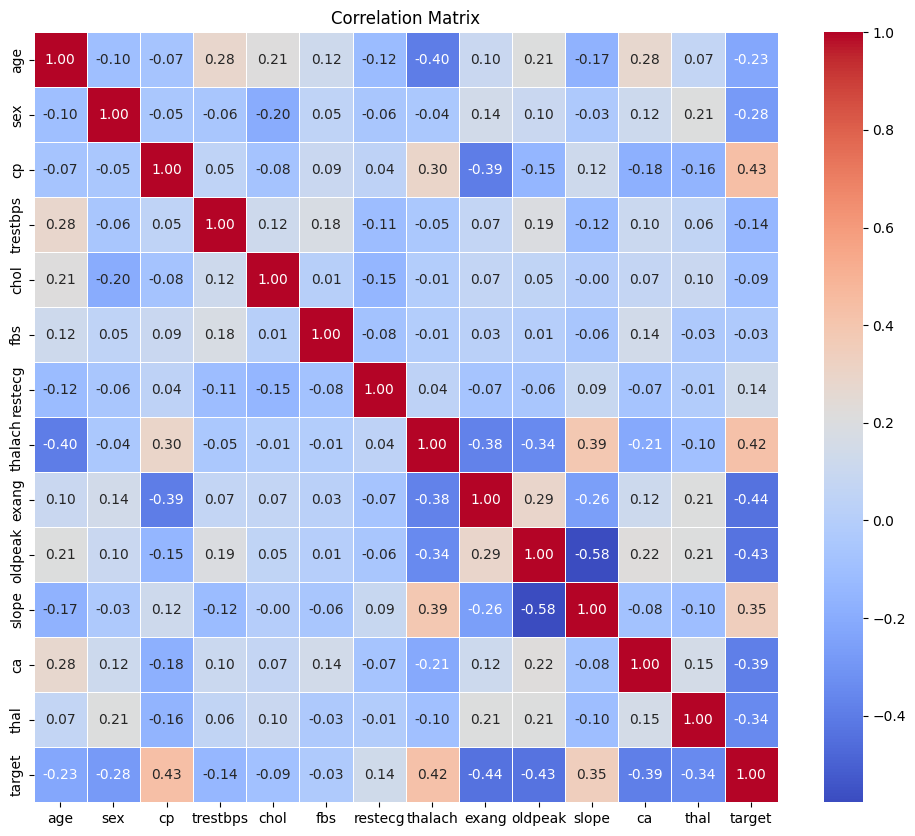

In [142]:
#Checking correlation

# Calculate correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [143]:
#Splitting the dataframe into training and testing sets

X = df.drop('target', axis=1)
y = df['target']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODELS**

Logistic Regression - Accuracy: 0.8360655737704918


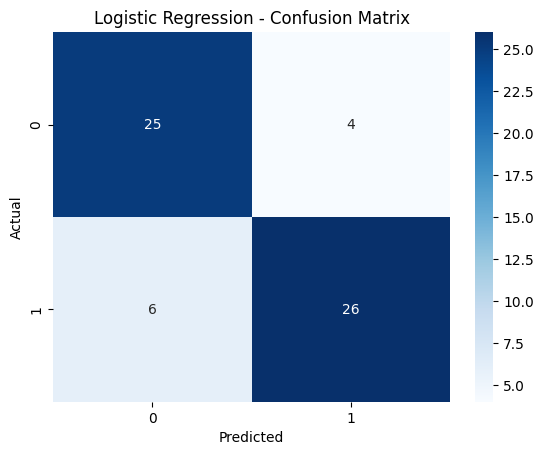

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [144]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression - Accuracy:", accuracy_logistic)

# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure()
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression - Classification Report:")
print(report_logistic)


Random Forest - Accuracy: 0.8688524590163934


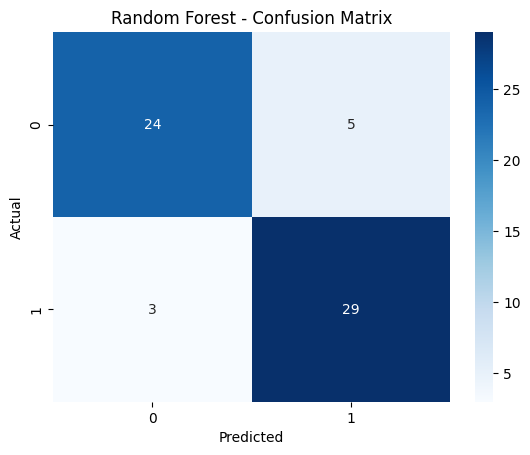

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [145]:
# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Accuracy:", accuracy_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest - Classification Report:")
print(report_rf)


SVM - Accuracy: 0.8688524590163934


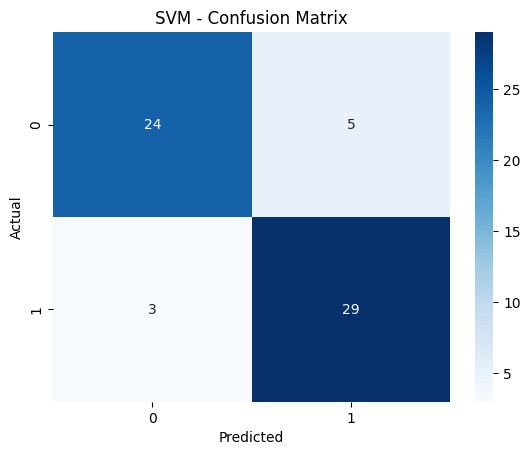

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [146]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM - Accuracy:", accuracy_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure()
sns.heatmap(cm_svm, annot=True, fmt="d", cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_svm = classification_report(y_test, y_pred_svm)
print("SVM - Classification Report:")
print(report_svm)


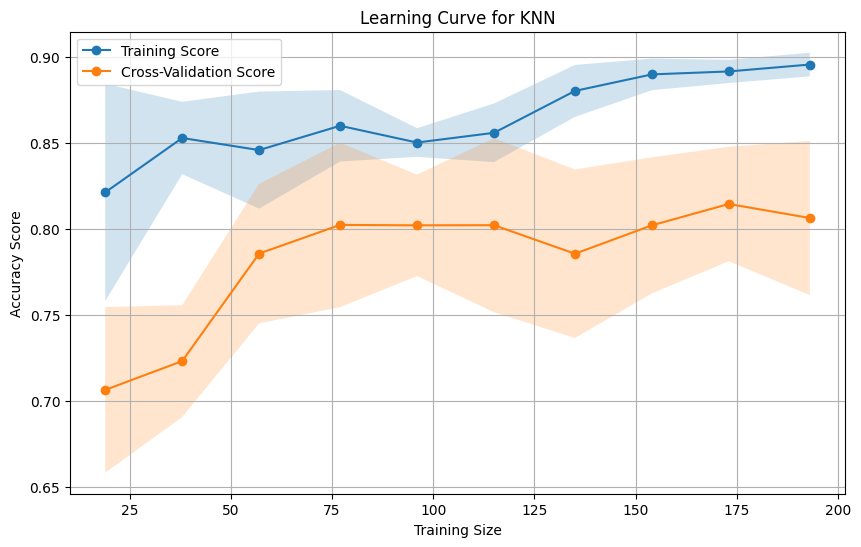

KNN - Accuracy: 0.8360655737704918


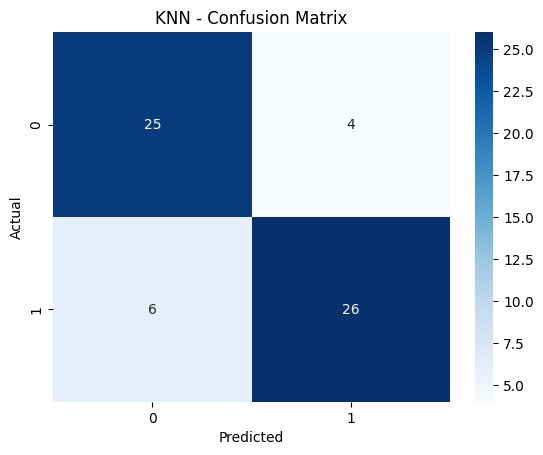

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [147]:

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Draw Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Add labels and title
plt.title('Learning Curve for KNN')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

# Fit the KNN model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN - Accuracy:", accuracy_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure()
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_knn = classification_report(y_test, y_pred_knn)
print("KNN - Classification Report:")
print(report_knn)


XGBoost - Accuracy: 0.819672131147541


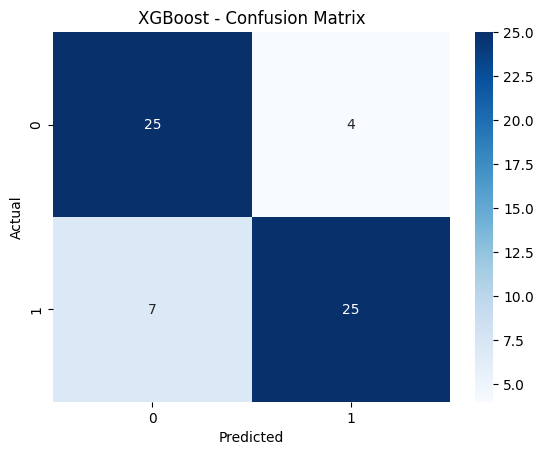

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [148]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost - Accuracy:", accuracy_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure()
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost - Classification Report:")
print(report_xgb)


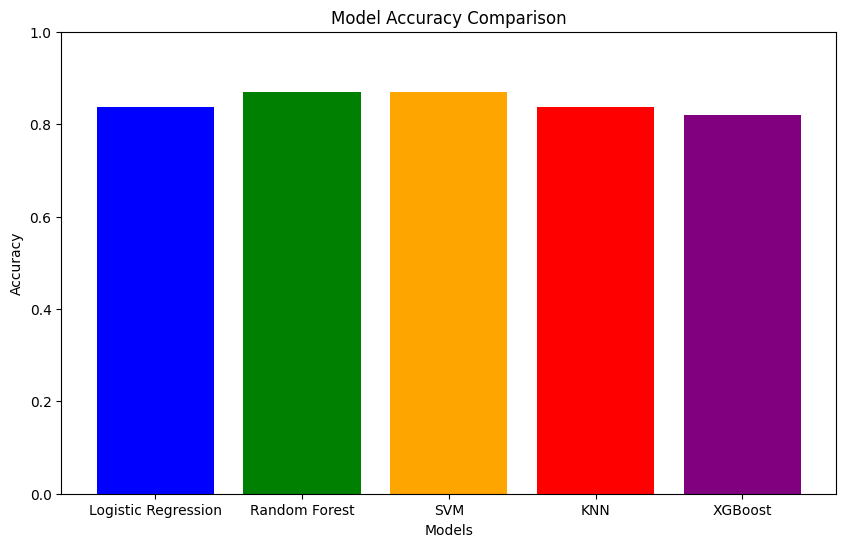

In [149]:
# List of models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_logistic),
               accuracy_score(y_test, y_pred_rf),
               accuracy_score(y_test, y_pred_svm),
               accuracy_score(y_test, y_pred_knn),
               accuracy_score(y_test, y_pred_xgboost)]  # Replace y_pred_xgboost with the actual variable for XGBoost predictions

# Bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1 for accuracy
plt.show()


In [150]:
#HYPERPARAMETER TUNING

# Hyperparameter tuning for Random Forest
RF_GRID = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), RF_GRID, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
random_forest_best = RandomForestClassifier(**best_params_rf)
random_forest_best.fit(X_train, y_train)
accuracy_rf_best = random_forest_best.score(X_test, y_test)
print(f"Random Forest (Best Hyperparameters) - Accuracy: {accuracy_rf_best:.4f}")

# Hyperparameter tuning for KNN
KNN_GRID = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), KNN_GRID, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)
accuracy_knn_best = knn_best.score(X_test, y_test)
print(f"KNN (Best Hyperparameters) - Accuracy: {accuracy_knn_best:.4f}")

Random Forest (Best Hyperparameters) - Accuracy: 0.8689
KNN (Best Hyperparameters) - Accuracy: 0.8689


**CONCLUSION**

We began by visualizing the distribution of numeric features and identifying outliers through histograms and boxplots. Despite the presence of outliers, a conscious decision was made to retain them, recognizing their potential to provide valuable insights into authentic variations within the data.

**Data Normalization:**
Subsequently, we normalized specific columns to ensure consistency in scale across features, enhancing the effectiveness of machine learning models.

**Model Comparison:**
We implemented several machine learning models, including Logistic Regression, Random Forest, Support Vector Machine (SVM), k-Nearest Neighbors (KNN), and XGBoost. Each model's performance was evaluated using accuracy, confusion matrix, and classification report. KNN, after hyperparameter tuning, demonstrated the highest accuracy, while other models also exhibited commendable performance.

**Hyperparameter Tuning:**
Hyperparameter tuning was conducted for Random Forest and KNN models, optimizing their configurations for improved accuracy.

In conclusion, our comprehensive exploration and comparison of machine learning models for heart disease classification revealed the effectiveness of KNN, particularly after hyperparameter tuning. The decision to retain outliers in the dataset was guided by the potential insights they could offer. Overall, this study provides valuable insights into predictive modeling for heart disease and emphasizes the significance of thoughtful data analysis and model optimization in healthcare applications.